In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dev_predict = pd.read_csv('../output.csv')
dev_label = pd.read_csv('../data/dev.csv')
dev = pd.merge(dev_label, dev_predict, on='id')
dev.head()

,id,source,sentence_1,sentence_2,label,binary-label,target
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0,1.9
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0,2.6
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0,4.7
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0,3.7
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0,2.3


<Axes: xlabel='label', ylabel='target'>

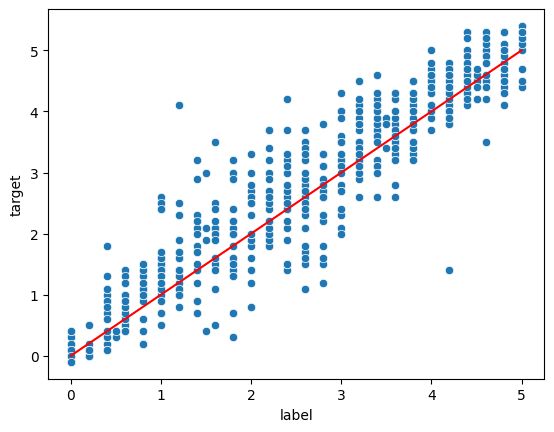

In [6]:
sns.scatterplot(x='label', y='target', data=dev)
sns.lineplot(x=[0, 5], y=[0, 5], color='red')

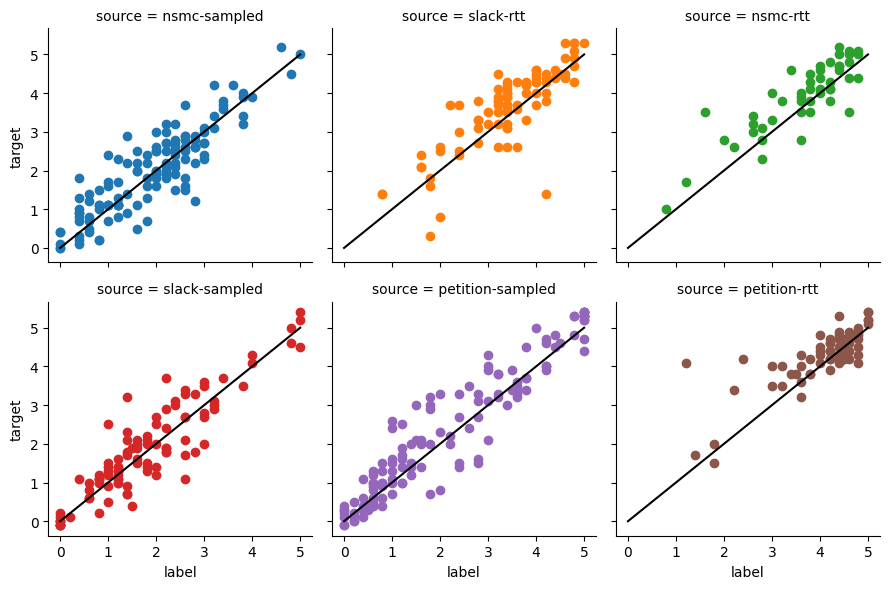

In [5]:
g = sns.FacetGrid(dev, col='source', hue='source', col_wrap=3)
g.map(plt.scatter, 'label', 'target')
g.map(sns.lineplot, x=[0, 5], y=[0, 5], color='black')

In [ ]:
dev['diff'] = abs(dev['label'] - dev['target'])
dev = dev.sort_values(by='diff', ascending=False)
for ele in dev.iterrows():
    print("", ele[1]['sentence_1'], "\n", ele[1]['sentence_2'], "\n", ele[1]['label'], ele[1]['target'])

In [8]:
loss_ge = 0
ge_cnt = 0
loss_le = 0
le_cnt = 0
for ele in dev.iterrows():
    if ele[1]['label'] < ele[1]['target']:
        loss_ge += ele[1]['diff']
        ge_cnt += 1
    else:
        loss_le += ele[1]['diff']
        le_cnt += 1
print("loss_ge:", loss_ge / ge_cnt)
print("loss_le:", loss_le / le_cnt)
loss_ge / ge_cnt - loss_le / le_cnt

loss_ge: 0.498148148148148
loss_le: 0.3207964601769901


0.1773516879711579